# Import Libraries

In [1]:
# Import required libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading the csv file and nameing the DataFrame.
df = pd.read_csv(r'C:\Users\Mohannad\Documents\DS_course_project\data\weather-sa-2017-2019-clean.csv')

df.shape

(249023, 15)

In [3]:
#view the datset
df

,Unnamed: 0,city,date,time,year,month,day,hour,minute,weather,temp,wind,humidity,barometer,visibility
0,0,Qassim,1 January 2017,00:00,2017,1,1,24,0,Clear,17,11,64%,1018.0,16
1,1,Qassim,1 January 2017,01:00,2017,1,1,1,0,Clear,17,6,64%,1018.0,16
2,2,Qassim,1 January 2017,03:00,2017,1,1,3,0,Clear,15,11,72%,1019.0,16
3,3,Qassim,1 January 2017,04:00,2017,1,1,4,0,Clear,15,11,72%,1019.0,16
4,4,Qassim,1 January 2017,05:00,2017,1,1,5,0,Clear,15,9,72%,1019.0,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249018,2848,Jawf,30 April 2019,19:00,2019,4,30,19,0,Passing clouds,32,19,14%,1014.0,-1
249019,2849,Jawf,30 April 2019,20:00,2019,4,30,20,0,Passing clouds,29,9,22%,1015.0,-1
249020,2850,Jawf,30 April 2019,21:00,2019,4,30,21,0,Passing clouds,27,7,24%,1016.0,-1
249021,2851,Jawf,30 April 2019,22:00,2019,4,30,22,0,Clear,26,0,26%,1017.0,16


In [4]:
# Take an overview look at the columns and thier Datatype.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249023 entries, 0 to 249022
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  249023 non-null  int64  
 1   city        249023 non-null  object 
 2   date        249023 non-null  object 
 3   time        249023 non-null  object 
 4   year        249023 non-null  int64  
 5   month       249023 non-null  int64  
 6   day         249023 non-null  int64  
 7   hour        249023 non-null  int64  
 8   minute      249023 non-null  int64  
 9   weather     249023 non-null  object 
 10  temp        249023 non-null  int64  
 11  wind        249023 non-null  int64  
 12  humidity    249006 non-null  object 
 13  barometer   248951 non-null  float64
 14  visibility  249023 non-null  int64  
dtypes: float64(1), int64(9), object(5)
memory usage: 28.5+ MB


In [5]:
df['humidity'] = df['humidity'].str.replace('%',' ')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249023 entries, 0 to 249022
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  249023 non-null  int64  
 1   city        249023 non-null  object 
 2   date        249023 non-null  object 
 3   time        249023 non-null  object 
 4   year        249023 non-null  int64  
 5   month       249023 non-null  int64  
 6   day         249023 non-null  int64  
 7   hour        249023 non-null  int64  
 8   minute      249023 non-null  int64  
 9   weather     249023 non-null  object 
 10  temp        249023 non-null  int64  
 11  wind        249023 non-null  int64  
 12  humidity    249006 non-null  object 
 13  barometer   248951 non-null  float64
 14  visibility  249023 non-null  int64  
dtypes: float64(1), int64(9), object(5)
memory usage: 28.5+ MB


In [6]:
df['humidity'] = df['humidity'].astype('float')
df

,Unnamed: 0,city,date,time,year,month,day,hour,minute,weather,temp,wind,humidity,barometer,visibility
0,0,Qassim,1 January 2017,00:00,2017,1,1,24,0,Clear,17,11,64.0,1018.0,16
1,1,Qassim,1 January 2017,01:00,2017,1,1,1,0,Clear,17,6,64.0,1018.0,16
2,2,Qassim,1 January 2017,03:00,2017,1,1,3,0,Clear,15,11,72.0,1019.0,16
3,3,Qassim,1 January 2017,04:00,2017,1,1,4,0,Clear,15,11,72.0,1019.0,16
4,4,Qassim,1 January 2017,05:00,2017,1,1,5,0,Clear,15,9,72.0,1019.0,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249018,2848,Jawf,30 April 2019,19:00,2019,4,30,19,0,Passing clouds,32,19,14.0,1014.0,-1
249019,2849,Jawf,30 April 2019,20:00,2019,4,30,20,0,Passing clouds,29,9,22.0,1015.0,-1
249020,2850,Jawf,30 April 2019,21:00,2019,4,30,21,0,Passing clouds,27,7,24.0,1016.0,-1
249021,2851,Jawf,30 April 2019,22:00,2019,4,30,22,0,Clear,26,0,26.0,1017.0,16


In [7]:
# Summary Statistics
df.describe()

,Unnamed: 0,year,month,day,hour,minute,temp,wind,humidity,barometer,visibility
count,249023.000000,249023.000000,249023.000000,249023.000000,249023.000000,249023.000000,249023.000000,249023.000000,249006.000000,248951.000000,249023.000000
mean,121690.686174,2017.710007,6.050694,15.691081,12.536890,0.131108,24.722624,12.957104,37.553139,1015.455355,11.053453
std,71831.546649,0.706113,3.521591,8.787958,6.910254,1.970710,8.880913,8.711619,23.593068,6.970779,7.053005
min,0.000000,2017.000000,1.000000,1.000000,1.000000,0.000000,-4.000000,-1.000000,0.000000,904.000000,-1.000000
25%,59402.500000,2017.000000,3.000000,8.000000,7.000000,0.000000,18.000000,7.000000,17.000000,1011.000000,5.000000
50%,121658.000000,2018.000000,6.000000,16.000000,13.000000,0.000000,24.000000,11.000000,32.000000,1016.000000,16.000000
75%,183913.500000,2018.000000,9.000000,23.000000,19.000000,0.000000,31.000000,19.000000,55.000000,1021.000000,16.000000
max,246169.000000,2019.000000,12.000000,31.000000,24.000000,59.000000,50.000000,163.000000,100.000000,1101.000000,161.000000


In [8]:
# Categorical Summary Statistics
df.describe(exclude="number")

,city,date,time,weather
count,249023,249023,249023,249023
unique,13,850,710,81
top,Jawf,24 November 2018,07:00,Clear
freq,20352,321,10415,98827


In [9]:
# summary statistics for each city
df.groupby(['city', 'year'])['temp'].describe()

count       mean        std   min   25%   50%   75%  \
city             year                                                         
Assir            2017  8520.0  21.261033   6.086760   3.0  17.0  21.0  25.0   
                 2018  2153.0  18.427775   4.360872   8.0  15.0  18.0  22.0   
                 2019  2815.0  18.619183   4.360031   5.0  15.0  18.0  22.0   
Baha             2017  8591.0  24.290886   6.927901   5.0  19.0  25.0  29.0   
                 2018  8558.0  23.807432   6.716105   4.0  19.0  24.0  29.0   
                 2019  2810.0  19.919217   5.197168   5.0  16.0  20.0  24.0   
EP               2017  7649.0  28.087724   9.492056   3.0  20.0  29.0  35.0   
                 2018  8220.0  28.446594   8.506230   7.0  22.0  29.0  35.0   
                 2019  2636.0  20.842564   5.104289   7.0  18.0  21.0  24.0   
Hail             2017  8579.0  27.469985  10.406379  -2.0  19.0  28.0  36.0   
                 2018  8677.0  26.916676   9.687967   3.0  19.0  27.0  35.0   
                 2019  2865.0  18.315183   6.125218   3.0  14.0  18.0  23.0   
Jawf             2017  8773.0  24.423344  10.828618  -4.0  16.0  25.0  33.0   
                 2018  8726.0  24.358354   9.517003   1.0  16.0  25.0  32.0   
                 2019  2853.0  15.191027   6.014385   2.0  10.0  15.0  19.0   
Jazan            2017  8534.0  21.292008   6.062454   3.0  17.0  21.0  25.0   
                 2018  8484.0  20.825554   5.919196   3.0  17.0  21.0  25.0   
                 2019  2811.0  18.606546   4.362769   5.0  15.0  18.0  22.0   
Madina           2017  8634.0  30.110609   8.552326   6.0  23.0  31.0  37.0   
                 2018  8479.0  29.339309   8.014884   8.0  23.0  30.0  36.0   
                 2019  2852.0  22.590112   5.431821   9.0  19.0  22.0  26.0   
Mecca            2017  8725.0  29.390602   4.454529  17.0  26.0  30.0  33.0   
                 2018  8686.0  29.761455   4.573103  18.0  26.0  30.0  33.0   
                 2019  2857.0  25.656983   3.606029  16.0  23.0  26.0  28.0   
Najran           2017  8543.0  21.267236   6.069728   3.0  17.0  21.0  25.0   
                 2018  8486.0  20.829484   5.934789   2.0  17.0  21.0  25.0   
                 2019  2818.0  18.540809   4.327546   5.0  15.0  18.0  22.0   
Northern boarder 2017  8676.0  25.338520  11.411197  -3.0  16.0  26.0  34.0   
                 2018  8707.0  26.027679   9.448959   3.0  18.0  26.0  33.0   
                 2019  2852.0  20.682328   6.788745   5.0  15.0  20.0  25.0   
Qassim           2017  8577.0  27.472310  10.410285  -2.0  19.0  28.0  36.0   
                 2018  8680.0  26.893664   9.670376   3.0  19.0  27.0  35.0   
                 2019  2536.0  17.660095   5.924076   3.0  13.0  17.0  22.0   
Riyadh           2017  6151.0  30.262071   9.301906   2.0  25.0  31.0  37.0   
                 2018  7401.0  29.192136   8.318985   8.0  23.0  30.0  36.0   
                 2019  2869.0  19.834437   6.128686   5.0  15.0  20.0  24.0   
Tabuk            2017  8707.0  23.573447   9.833835  -1.0  16.0  24.0  31.0   
                 2018  8663.0  23.936627   9.045475   1.0  17.0  25.0  31.0   
                 2019  2870.0  15.885366   6.272128   1.0  11.0  15.0  20.0   

                        max  
city             year        
Assir            2017  35.0  
                 2018  29.0  
                 2019  30.0  
Baha             2017  39.0  
                 2018  39.0  
                 2019  33.0  
EP               2017  50.0  
                 2018  48.0  
                 2019  41.0  
Hail             2017  48.0  
                 2018  47.0  
                 2019  37.0  
Jawf             2017  46.0  
                 2018  46.0  
                 2019  35.0  
Jazan            2017  35.0  
                 2018  37.0  
                 2019  30.0  
Madina           2017  47.0  
                 2018  46.0  
                 2019  39.0  
Mecca            2017  49.0  
                 2018  47.0  
                 2019  39.0  
Najr

In [10]:
# Check for missing values

df.isnull().sum()

Unnamed: 0     0
city           0
date           0
time           0
year           0
month          0
day            0
hour           0
minute         0
weather        0
temp           0
wind           0
humidity      17
barometer     72
visibility     0
dtype: int64

In [11]:
# Drop Null Values
df = df.dropna( how='any', subset=['humidity', 'barometer'])
df.isnull().sum()

Unnamed: 0    0
city          0
date          0
time          0
year          0
month         0
day           0
hour          0
minute        0
weather       0
temp          0
wind          0
humidity      0
barometer     0
visibility    0
dtype: int64

In [12]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,city,date,time,year,month,day,hour,minute,weather,temp,wind,humidity,barometer,visibility
0,Qassim,1 January 2017,00:00,2017,1,1,24,0,Clear,17,11,64.0,1018.0,16
1,Qassim,1 January 2017,01:00,2017,1,1,1,0,Clear,17,6,64.0,1018.0,16
2,Qassim,1 January 2017,03:00,2017,1,1,3,0,Clear,15,11,72.0,1019.0,16
3,Qassim,1 January 2017,04:00,2017,1,1,4,0,Clear,15,11,72.0,1019.0,16
4,Qassim,1 January 2017,05:00,2017,1,1,5,0,Clear,15,9,72.0,1019.0,16


<AxesSubplot:>

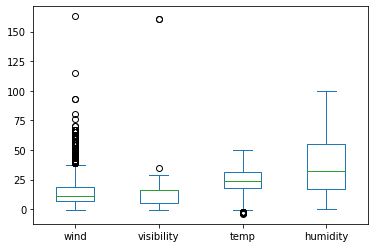

In [13]:
# Creating box plot to check for extreme value

df[['wind', 'visibility', 'temp', 'humidity']].plot(kind='box')

In [14]:
#  Drop exterme value

# df = df[df[['wind', 'visibility']] < 125 ]

# Not sure if we can do this step?

In [15]:
# using groupby function with aggregation to get mean, min and max values for temprature per city
result = df.groupby('city').agg({'temp': ['mean', 'min', 'max']})
  
result

temp        
                       mean min max
city                               
Assir             20.257414   3  35
Baha              23.468233   4  39
EP                27.195677   3  50
Hail              25.925922  -2  48
Jawf              23.103996  -4  46
Jazan             20.711735   3  37
Madina            28.708475   6  47
Mecca             29.023585  16  49
Najran            20.692951   2  37
Northern boarder  24.980626  -3  47
Qassim            25.959416  -2  48
Riyadh            27.957369   2  47
Tabuk             22.638430  -1  45

In [16]:
# Average  Temprature  for each of the city
df.groupby([df["year"], "city"])["temp"].mean()

year  city            
2017  Assir               21.261033
      Baha                24.290886
      EP                  28.042176
      Hail                27.465415
      Jawf                24.429353
      Jazan               21.292008
      Madina              30.110609
      Mecca               29.390602
      Najran              21.267236
      Northern boarder    25.342864
      Qassim              27.467740
      Riyadh              30.260813
      Tabuk               23.572742
2018  Assir               18.427775
      Baha                23.807760
      EP                  28.450140
      Hail                26.917935
      Jawf                24.359427
      Jazan               20.825554
      Madina              29.338759
      Mecca               29.762349
      Najran              20.829484
      Northern boarder    26.027679
      Qassim              26.894919
      Riyadh              29.192136
      Tabuk               23.937312
2019  Assir               18.619183
     

# Data Visualization

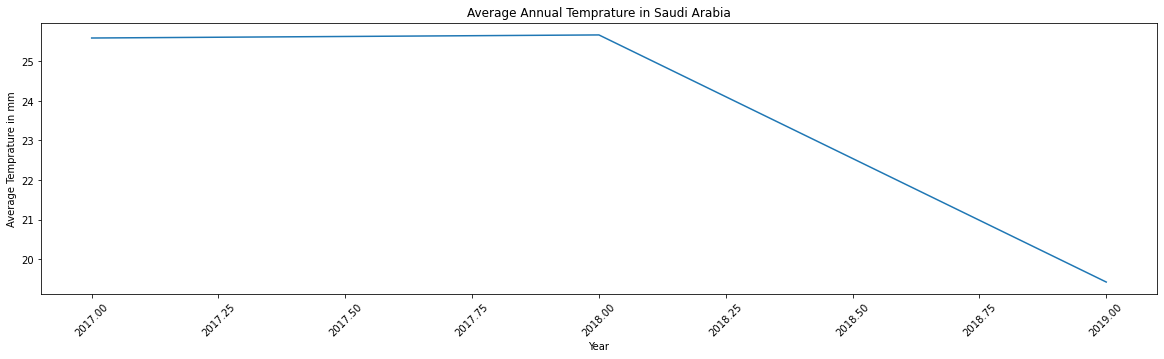

In [17]:
plt.figure(figsize = [20,5]) #[width, height]
df.groupby(['year'])['temp'].mean().plot()
plt.title( 'Average Annual Temprature in Saudi Arabia')
plt.ylabel('Average Temprature in mm')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.show()

Text(0.5, 0, 'Months')

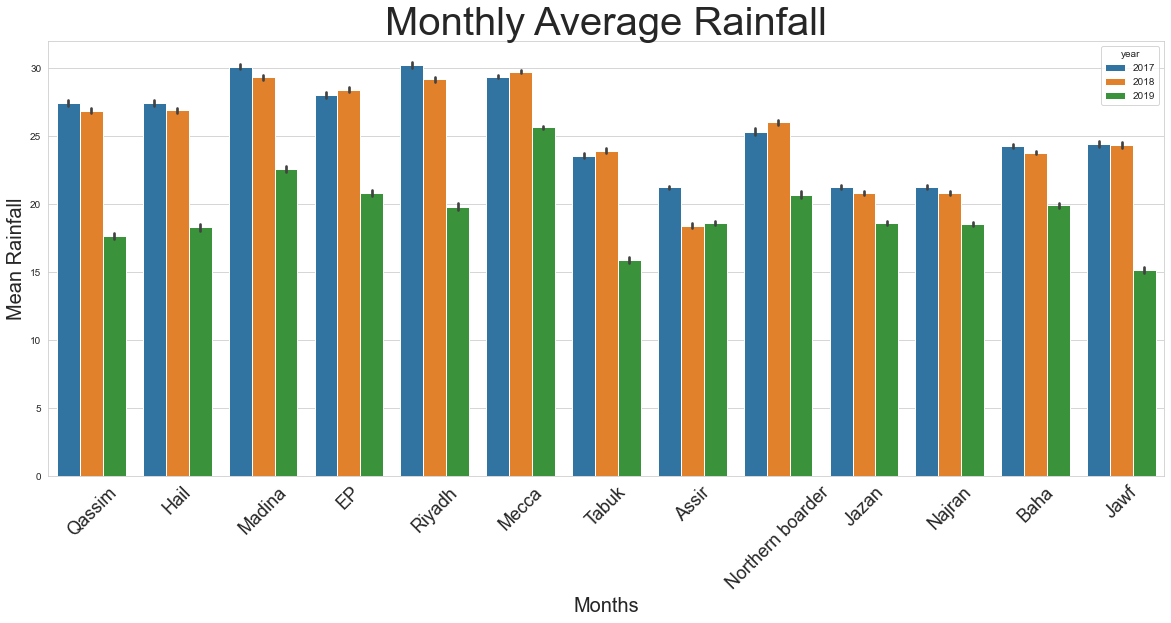

In [18]:
sns.set_style('whitegrid')
plt.subplots(figsize=(20,8))
plt.title("Monthly Average Rainfall", fontsize=40)
sns.barplot(x="city", y="temp", hue='year', data=df)
plt.xticks(rotation = 45)
plt.xticks(fontsize=18)
plt.ylabel("Mean Rainfall",fontsize=20)
plt.xlabel("Months",fontsize=20)

In [19]:
# Data Modelding


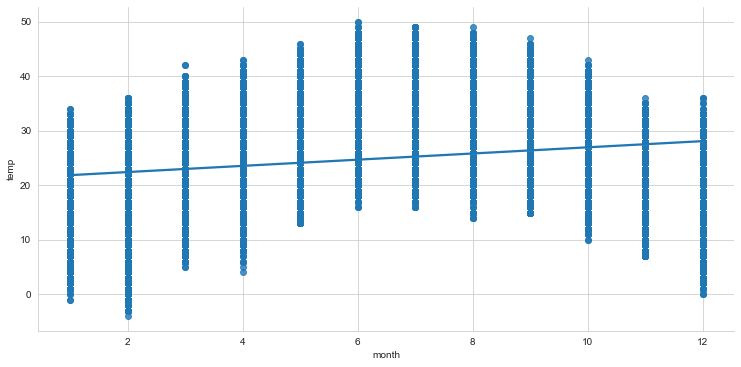

In [20]:
# Plot Regression Line

sns.lmplot(x = "month", y = "temp", data = df, height = 5.2, aspect = 2);


In [21]:
# Importing train-test-split 
from sklearn.model_selection import train_test_split



In [36]:
# Putting feature variable to X
X = df.drop(['temp', 'time','city', 'date', 'weather'],axis=1)

# Putting response variable to y
y = df['temp']

In [37]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 99)
X_train.head()

,year,month,day,hour,minute,wind,humidity,barometer,visibility
104755,2018,2,21,21,0,6,61.0,1008.0,-1
98457,2017,6,2,16,0,37,25.0,1006.0,16
245120,2018,11,18,11,0,7,53.0,1028.0,16
39560,2019,4,16,6,0,11,43.0,1014.0,-1
114403,2019,4,2,19,0,22,36.0,1012.0,16


In [38]:
# Importing linear regression from sklearn library
from sklearn.linear_model import LinearRegression

model = LinearRegression()

X_train = df[['year', 'month', 'day', 'wind', 'barometer', 'visibility']]
y_train = df[['temp']]

model.fit(X_train, y_train)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [[-0.97220281  0.46566375  0.01396772  0.17780646 -0.81740991  0.00645351]]
Intercept: [2810.97610221]


In [39]:
# Let's check the evaluation metrics of our  model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn import metrics


    
# Making predictions
y_pred = model.predict(X_test)
y_pred




ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 6 is different from 9)

In [ ]:

plt.figure(figsize=(15,6))
plt.plot(X_train, y_train,'o', alpha = 0.5)
plt.plot(X_train, y_pred, 'r', alpha = 0.5)
plt.xlabel('month')
plt.ylabel('temp')
print("MSE:", metrics.mean_squared_error(y_pred, y_train))
print("R^2:", metrics.r2_score(y_hat, y_train))
print("var:", y.var())

NameError: name 'y_pred' is not defined

In [ ]:
X = np.array([2030]).reshape(-1,1)
X